# text classification with Naive Bayes, Logistic Regression and Fasttext

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
np.random.seed(17)
warnings.filterwarnings("ignore")

In [2]:
#data source - https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv
classes = np.loadtxt('./data/classes.txt', dtype=str)
class_dict = {i+1:x for i, x in enumerate(classes)}
columns = ["CLASS", "TITLE", "DESCRIPTION"]
ag_new_train = pd.read_csv('./data/train.csv', header=None)
ag_new_train.columns = columns
ag_new_train.head()

,CLASS,TITLE,DESCRIPTION
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [3]:
df = pd.DataFrame(data=ag_new_train["TITLE"] + " " + ag_new_train["DESCRIPTION"], columns=["POST"])
df["LABEL"] = ag_new_train["CLASS"].map(class_dict)

In [4]:
df.head()

,POST,LABEL
0,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,"Oil prices soar to all-time record, posing new...",Business


In [5]:
len(df)

120000

In [6]:
def print_plot(index):
    example = df[df.index == index][['POST', 'LABEL']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])
print_plot(17)

In a Down Market, Head Toward Value Funds There is little cause for celebration in the stock market these days, but investors in value-focused mutual funds have reason to feel a bit smug -- if only because they've lost less than the folks who stuck with growth.
Label: Business


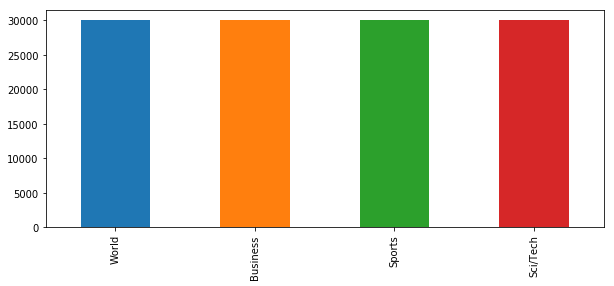

In [7]:
plt.figure(figsize=(10,4))
df["LABEL"].value_counts().plot(kind='bar');

In [8]:
ag_new_test = pd.read_csv('./data/test.csv', header=None)
ag_new_test.columns = columns
ag_new_test.head()

,CLASS,TITLE,DESCRIPTION
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [9]:
test_df = pd.DataFrame(data=ag_new_test["TITLE"] + " " + ag_new_test["DESCRIPTION"], columns=["POST"])
test_df["LABEL"] = ag_new_test["CLASS"].map(class_dict)

In [10]:
test_df.head()

,POST,LABEL
0,Fears for T N pension after talks Unions repre...,Business
1,The Race is On: Second Private Team Sets Launc...,Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP) ...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP) ...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,Sci/Tech


In [11]:
len(test_df)

7600

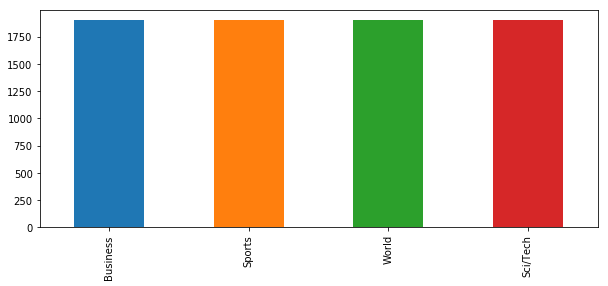

In [12]:
plt.figure(figsize=(10,4))
test_df["LABEL"].value_counts().plot(kind='bar');

In [13]:
pd.isnull(df['POST']).sum()

0

In [14]:
df["POST_LENGTH"] = df["POST"].map(len)
df["POST_NUM_WORDS"] = df["POST"].map(lambda x: len(x.split()))

In [15]:
df.head()

,POST,LABEL,POST_LENGTH,POST_NUM_WORDS
0,Wall St. Bears Claw Back Into the Black (Reute...,Business,144,21
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Business,266,36
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business,232,36
3,Iraq Halts Oil Exports from Main Southern Pipe...,Business,256,36
4,"Oil prices soar to all-time record, posing new...",Business,234,37


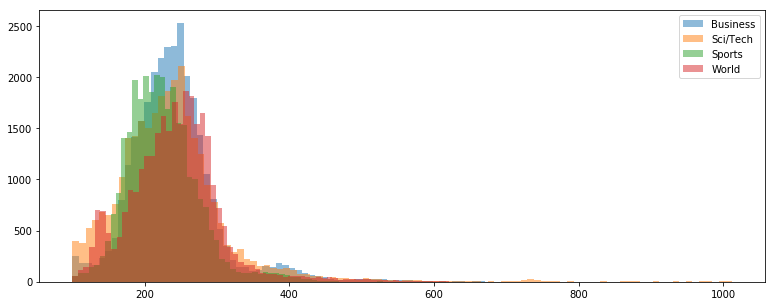

In [16]:
plt.figure(figsize=(13, 5))
for c in df.LABEL.unique():
    plt.hist(df[df.LABEL == c]["POST_LENGTH"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.show()
plt.close()

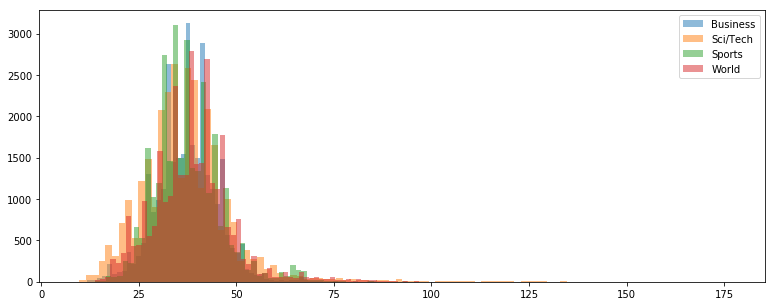

In [17]:
plt.figure(figsize=(13, 5))
for c in df.LABEL.unique():
    plt.hist(df[df.LABEL == c]["POST_NUM_WORDS"], label=c, bins=100, alpha=0.5)
plt.legend()
plt.show()
plt.close()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(df["POST"], df["LABEL"], 
                                                  test_size=0.1, random_state = 17, stratify = df["LABEL"])
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

# Count Vectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
CountVec = CountVectorizer(token_pattern='\w+', lowercase=False)

In [22]:
sample_data = [
    "the quick brown fox jumps.",
    "jumps over the lazy dog!",
    "the lazy dog and the quick fox."
]

index = ["Doc1", "Doc2", "Doc3"]

In [23]:
sample_counts = CountVec.fit_transform(sample_data)

In [24]:
pd.DataFrame(sample_counts.toarray(), columns=CountVec.get_feature_names(), index=index)

,and,brown,dog,fox,jumps,lazy,over,quick,the
Doc1,0,1,0,1,1,0,0,1,1
Doc2,0,0,1,0,1,1,1,0,1
Doc3,1,0,1,1,0,1,0,1,2


In [25]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

#### max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
#### max_df = 25 means "ignore terms that appear in more than 25 documents".
#### min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
#### min_df = 5 means "ignore terms that appear in less than 5 documents".

In [26]:
CountVec = CountVectorizer(token_pattern='\w+', lowercase=False, ngram_range=(1, 2), min_df=2)

In [27]:
sample_counts = CountVec.fit_transform(sample_data)

In [28]:
pd.DataFrame(sample_counts.toarray(), columns=CountVec.get_feature_names(), index=index)

,dog,fox,jumps,lazy,lazy dog,quick,the,the lazy,the quick
Doc1,0,1,1,0,0,1,1,0,1
Doc2,1,0,1,1,1,0,1,1,0
Doc3,1,1,0,1,1,1,2,1,1


In [29]:
len(X_train)

108000

In [30]:
for min_df in [1, 5, 10, 20, 50]:
    CountVec = CountVectorizer(lowercase=False, token_pattern='\w+', min_df=min_df)
    CountVec.fit(X_train)
    print("min_df={}, number_of_words: {}".format(min_df, len(CountVec.get_feature_names())))

min_df=1, number_of_words: 84771
min_df=5, number_of_words: 31819
min_df=10, number_of_words: 21415
min_df=20, number_of_words: 14180
min_df=50, number_of_words: 7898


In [31]:
for min_df in [1, 5, 10, 20, 50]:
    CountVec = CountVectorizer(lowercase=False, token_pattern='\w+', min_df=min_df, ngram_range=(1, 2))
    CountVec.fit(X_train)
    print("min_df={}, number_of_words: {}".format(min_df, len(CountVec.get_feature_names())))

min_df=1, number_of_words: 1339499
min_df=5, number_of_words: 148933
min_df=10, number_of_words: 72660
min_df=20, number_of_words: 37068
min_df=50, number_of_words: 15528


# Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [33]:
best_naive_bayes_score, best_naive_bayes_clf = 0, None

In [34]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+')),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb    

train accuracy 0.920
val accuracy 0.906



In [35]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb    

train accuracy 0.954
val accuracy 0.913



In [36]:
nb = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 3))),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb    

train accuracy 0.972
val accuracy 0.913



# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
best_log_reg_score, best_log_reg_clf = 0, None

In [39]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+')),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    best_log_reg_score = val_score
    best_log_reg_clf = logreg    

train accuracy 0.978
val accuracy 0.916



In [40]:
logreg = Pipeline([('countVec', CountVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    best_log_reg_score = val_score
    best_log_reg_clf = logreg    

train accuracy 1.000
val accuracy 0.923



# TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
TFIDF = TfidfVectorizer(token_pattern='\w+', lowercase=False)

In [43]:
sample_tf_counts = TFIDF.fit_transform(sample_data)

In [44]:
pd.DataFrame(sample_tf_counts.toarray(), columns=TFIDF.get_feature_names(), index=index).round(2)

,and,brown,dog,fox,jumps,lazy,over,quick,the
Doc1,0.00,0.57,0.00,0.43,0.43,0.00,0.00,0.43,0.34
Doc2,0.00,0.00,0.43,0.00,0.43,0.43,0.57,0.00,0.34
Doc3,0.46,0.00,0.35,0.35,0.00,0.35,0.00,0.35,0.54


In [45]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
               ('clf', MultinomialNB()),])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb

train accuracy 0.940
val accuracy 0.910



In [46]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    best_log_reg_score = val_score
    best_log_reg_clf = logreg

train accuracy 0.949
val accuracy 0.914



In [47]:
from fastText import train_supervised

def to_fasttext_format(data: list, labels: list, save_path: str=None):
    ft_data = []
    for d, l in zip(data, labels):
        ft_data.append("__label__{} {}".format(l, d))
    if save_path:
        np.savetxt(save_path, ft_data, fmt='%s')
    else:
        return ft_data
    
def train_fasttext(X_train, y_train, wordNgrams=1, minCount=1, ft_train_path="./data/tmp_train.txt"):
    to_fasttext_format(X_train, y_train, save_path=ft_train_path)
    ft_model = train_supervised(ft_train_path, wordNgrams=wordNgrams, minCount=minCount, epoch=10, loss="ns")
    train_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_train))[0]]    
    print('train accuracy {0:,.3f}'.format(accuracy_score(train_preds, y_train)))
    
    return ft_model

In [48]:
best_fasttext_score, best_fasttext_clf = 0, None

In [49]:
ft_model = train_fasttext(X_train, y_train)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model    

train accuracy 0.987
val accuracy 0.914


In [50]:
ft_model = train_fasttext(X_train, y_train, wordNgrams=2)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model    

train accuracy 1.000
val accuracy 0.920


# text preprocessing

In [51]:
word_counts = {}
for post in X_train:
    for word in post.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [52]:
top_k = 10
sorted(word_counts.items(), key=lambda t: t[1], reverse=True)[:top_k]

[('the', 159491),
 ('to', 105904),
 ('a', 88393),
 ('of', 87522),
 ('in', 83008),
 ('and', 61241),
 ('on', 49700),
 ('for', 43587),
 ('-', 35254),
 ('#39;s', 27798)]

In [53]:
from nltk.corpus import stopwords

In [54]:
stop_words = set(stopwords.words('english'))

In [55]:
cnt = 0
for w, c in sorted(word_counts.items(), key=lambda t: t[1], reverse=True):
    if w.lower() not in stop_words:
        print(w, c)
        cnt += 1
        if cnt == top_k:
            break

- 35254
#39;s 27798
said 14811
(Reuters) 11576
US 10382
new 9195
(AP) 7472
first 7354
-- 7104
AP 7010


In [56]:
def get_sample_with(data, expr, size=5, with_spaces=True):
    try:
        if with_spaces:
            [print(i, end='\n\n') for i in np.random.choice([i for i in data if ' {} '.format(expr) in i], size)]
        else:
            [print(i, end='\n\n') for i in np.random.choice([i for i in data if expr in i], size)]
    except:
        return "no such examples"

In [57]:
get_sample_with(X_train, " #39;", with_spaces=False, size=3)

NASA Prepares for Future Space Exploration Risk CLEVELAND, OH -- As NASA (news - web sites) readies the space shuttle fleet to fly again, the agency #39;s risk management teams are also paying attention to risk issues that affect the International Space Station (news - web sites).

Mistakes lead to Berlin fall MIAMI The opening series for Miami couldn #39;t have begun more promisingly. On first down from the 50, Brock Berlin completed a 24-yard pass to Virginia Tech #39;s 26.

Samsung to Launch Phone with Mini Hard Drive Samsung Electronics Co. Ltd., the world #39;s third-largest handset maker, said on Tuesday it was launching the first mobile phone with a stamp-sized hard disc drive this month that would expand the memory capacity by 15 times.



In [58]:
get_sample_with(X_train, "--", with_spaces=False, size=3)

Space capsule crashes Genesis, payload of solar particles slam &lt;b&gt;...&lt;/b&gt; The Genesis space capsule and its precious cargo -- billions of particles from the sun -- crashed into the Utah desert Wednesday in a last-minute bungling of a near-flawless, three-year scientific odyssey.

Cassini found two little Saturn moons BEIJING, Aug.18(Xinhuanet) -- NASA #39;s Cassini spacecraft has spied two new moons around the satellite-rich Saturn. 

Asia DRAM Report:Samsung Elec To Up DRAM Output Vs Flash SEOUL (Dow Jones)--A precipitous fall in prices for flash-memory chips and anticipated demand for next-generation DDR2 dynamic random access memory chips has spurred Samsung Electronics Co.



In [59]:
sorted(word_counts.items(), key=lambda t: t[1])[:top_k]

[('8.2megapixel', 1),
 ('single-lens', 1),
 ('(SLR)', 1),
 ('semi-professional', 1),
 ('EOS', 1),
 ('20D,', 1),
 ('film-based', 1),
 ('led,', 1),
 ('"vilification"', 1),
 ('(CTIA', 1)]

In [60]:
sorted(word_counts.keys())

['!',
 '!!?\\\\&lt;Bush&gt;',
 '!!\\\\&lt;Bush&gt;',
 '!).',
 '!K7',
 '"',
 '"\'CSI\'',
 '".jobs"',
 '".md"',
 '".mobi"',
 '".post"',
 '".travel"',
 '"10',
 '"100',
 '"200',
 '"2046"',
 '"24"',
 '"400',
 '"403',
 '"47',
 '"50-50"',
 '"527"',
 '"60',
 '"75',
 '"A',
 '"A"-listers',
 '"A1"\\from',
 '"A2,"',
 '"AdWords',
 '"Add',
 '"Aeon',
 '"Agassi,',
 '"Air',
 '"Alex',
 '"Alien',
 '"Alive"',
 '"All',
 '"America',
 '"American',
 '"And',
 '"Angels',
 '"Anna',
 '"Anything',
 '"Apple',
 '"Aren\'t',
 '"Ari"',
 '"Around',
 '"Arrested',
 '"As',
 '"Asian',
 '"Ask',
 '"Asteroid,"',
 '"Astro',
 '"AstroTurf"',
 '"Atari',
 '"Atkins"',
 '"Ayurvedic"',
 '"Beam',
 '"Because,"',
 '"Being',
 '"Big',
 '"Billy,',
 '"BioBus"',
 '"Black',
 '"Blade:',
 '"Blaster"',
 '"Blind"',
 '"Bloody',
 '"Blue',
 '"Boost"',
 '"Boots"',
 '"Boston',
 '"Bourne',
 '"Buckyball"',
 '"Buenos',
 '"Bush-Kerry',
 '"CBS',
 '"Cachirulo,"',
 '"Call',
 '"Camp',
 '"Can',
 '"Captain',
 '"Carmen',
 '"Cars"',
 '"Celebrating',
 '"Cell"',
 '"

In [61]:
CountVec = CountVectorizer(token_pattern='\w+', lowercase=False)
CountVec.fit(X_train)
len(CountVec.get_feature_names())

84771

In [62]:
import re

In [63]:
letters_numbers = re.compile(r'[a-zA-Z0-9]+')

In [64]:
sample = X_train[3]
print(sample, end="\n\n")
print(" ".join(letters_numbers.findall(sample)))

Conway acknowledges slamming Oracle (USATODAY.com) USATODAY.com - A subdued Craig Conway admitted Wednesday that he responded to a hostile takeover bid for the company he led, PeopleSoft (PSFT), with a campaign of "vilification" aimed at Oracle (ORCL) and its chief executive, Larry Ellison.

Conway acknowledges slamming Oracle USATODAY com USATODAY com A subdued Craig Conway admitted Wednesday that he responded to a hostile takeover bid for the company he led PeopleSoft PSFT with a campaign of vilification aimed at Oracle ORCL and its chief executive Larry Ellison


In [65]:
X_train_prep = []
for desc in X_train:
    only_letter_words = letters_numbers.findall(desc)
    only_letter_desc = " ".join(only_letter_words)
    only_letter_desc = only_letter_desc.lower()
    X_train_prep.append(only_letter_desc)
X_train_prep = np.array(X_train_prep)

In [66]:
CountVec = CountVectorizer(token_pattern='\w+')
CountVec.fit(X_train_prep)
words = np.array(CountVec.get_feature_names())
len(words)

62621

In [67]:
words[:top_k]

array(['0', '00', '000', '000016447', '00010563n', '0002', '0004287',
       '0005173miami050', '000660', '0009875buffalo040'], dtype='<U38')

In [68]:
word_counts = {}
for post in X_train_prep:
    for word in post.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [69]:
sorted(word_counts.items(), key=lambda t: t[1], reverse=True)[:top_k]

[('the', 184705),
 ('to', 108741),
 ('a', 102099),
 ('of', 88674),
 ('in', 86943),
 ('and', 62705),
 ('s', 55846),
 ('on', 51977),
 ('for', 45642),
 ('39', 39910)]

In [70]:
sorted(word_counts.items(), key=lambda t: t[1])[:top_k]

[('2megapixel', 1),
 ('20d', 1),
 ('achievers', 1),
 ('dejuana', 1),
 ('inhis', 1),
 ('thestaff', 1),
 ('thornburgh', 1),
 ('boccardi', 1),
 ('mackerel', 1),
 ('canizares', 1)]

In [71]:
cnt = 0
for w, c in sorted(word_counts.items(), key=lambda t: t[1], reverse=True):
    if w.lower() not in stop_words:
        print(w, c)
        cnt += 1
        if cnt == top_k:
            break

39 39910
new 19242
said 18212
reuters 17478
ap 14684
gt 11975
lt 11930
us 11889
two 9205
first 8838


In [72]:
get_sample_with(X_train_prep, "gt", size=1)

voyager capital becomes the first venture firm to join the open lt b gt lt b gt voyager capital a leading pacific northwest information technology venture firm has announced it is the first venture firm to join the open source development labs osdl an oregon based organization dedicated to accelerating the growth and adoption of



In [73]:
get_sample_with(X_train, "gt", with_spaces=False, size=1)

Amid unrest, Iraq president says vote delay would aid  quot;forces of &lt;b&gt;...&lt;/b&gt; BAGHDAD : Iraq #39;s interim President Ghazi al-Yawar, ahead of a meeting with US President George W. Bush, rejected any delay to January 30 polls, saying postponement would hand victory to the  quot;forces of darkness quot;.



In [74]:
from unidecode import unidecode
from nltk.stem import PorterStemmer

In [75]:
print(unidecode("C'est la première fois que deux équipes @"))
print(unidecode("водка"))
print(unidecode(u"北亰"))

C'est la premiere fois que deux equipes @
vodka
Bei Jing 


In [76]:
letters_numbers = re.compile(r'[a-zA-Z0-9]+')
stemmer = PorterStemmer()

def preprocess_text(text):
    text = unidecode(text)
    text = text.replace(' #39;', "'")
    text_words = letters_numbers.findall(text)
    text_words = [word for word in text_words if (word not in stop_words) or (len(word) > 2)]
    text_words = [stemmer.stem(word) for word in text_words]    
    text = " ".join(text_words)
    return text

In [77]:
sample_text = np.random.choice(X_train)
sample_text

"Nikkei Opens Up, Led by Techs, Exporters (Reuters) Reuters - Tokyo's Nikkei average opened 0.59\\percent higher on Tuesday as investors sought bargains among\\tech firms and exporters, but gains were limited by caution\\ahead of a monetary policy meeting in the United States during\\the day."

In [78]:
preprocess_text(sample_text)

'nikkei open Up led tech export reuter reuter tokyo nikkei averag open 0 59 percent higher tuesday investor sought bargain among tech firm and export but gain were limit caution ahead monetari polici meet the unit state dure the day'

In [79]:
from tqdm import tqdm_notebook

In [80]:
X_train_prep2 = []
for desc in tqdm_notebook(X_train):
    X_train_prep2.append(preprocess_text(desc))
X_train_prep2 = np.array(X_train_prep2)

In [81]:
X_val_prep2 = []
for desc in tqdm_notebook(X_val):
    X_val_prep2.append(preprocess_text(desc))
X_val_prep2 = np.array(X_val_prep2)

In [82]:
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+')),
               ('clf', MultinomialNB()),])
nb.fit(X_train_prep2, y_train)

y_pred = nb.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    print("text preprocessing improved result for naive bayes")
    print("don't forget to preprocess test data as well")
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb

train accuracy 0.914
val accuracy 0.904



In [83]:
import time

In [84]:
start = time.time()
nb = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_prep2, y_train)

y_pred = nb.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(nb.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_naive_bayes_score:
    print("text preprocessing improved result for naive bayes")
    print("don't forget to preprocess test data as well")
    best_naive_bayes_score = val_score
    best_naive_bayes_clf = nb
print("\ntook {} seconds".format(time.time() - start))

train accuracy 0.940
val accuracy 0.913

text preprocessing improved result for naive bayes
don't forget to preprocess test data as well

took 16.0367910861969 seconds


In [85]:
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+')),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train_prep2, y_train)

y_pred = logreg.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    print("text preprocessing improved result for logistic regression")
    print("don't forget to preprocess test data as well")
    best_log_reg_score = val_score
    best_log_reg_clf = logreg

train accuracy 0.933
val accuracy 0.916



In [86]:
start = time.time()
logreg = Pipeline([('tfidf', TfidfVectorizer(lowercase=False, token_pattern='\w+', ngram_range=(1, 2))),
                   ('clf', LogisticRegression(n_jobs=-2, solver="lbfgs", random_state=42)),])
logreg.fit(X_train_prep2, y_train)

y_pred = logreg.predict(X_val_prep2)
val_score = accuracy_score(y_pred, y_val)

print('train accuracy {0:,.3f}'.format(accuracy_score(logreg.predict(X_train_prep2), y_train)))
print('val accuracy {0:,.3f}\n'.format(val_score))

if val_score > best_log_reg_score:
    print("text preprocessing improved result for logistic regression")
    print("don't forget to preprocess test data as well")
    best_log_reg_score = val_score
    best_log_reg_clf = logreg
print("\ntook {} seconds".format(time.time() - start))

train accuracy 0.947
val accuracy 0.915


took 73.08888149261475 seconds


In [87]:
ft_model = train_fasttext(X_train_prep2, y_train, wordNgrams=1)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val_prep2))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:    
    print("text preprocessing improved result for fasttext")
    print("don't forget to preprocess test data as well")
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model

train accuracy 0.951
val accuracy 0.915


In [88]:
start = time.time()
ft_model = train_fasttext(X_train_prep2, y_train, wordNgrams=2)
val_preds = [i[0].split('_')[-1] for i in ft_model.predict(list(X_val_prep2))[0]]
val_score = accuracy_score(val_preds, y_val)
print('val accuracy {0:,.3f}'.format(val_score))

if val_score > best_fasttext_score:    
    print("text preprocessing improved result for fasttext")
    print("don't forget to preprocess test data as well")
    best_fasttext_score = val_score
    best_fasttext_clf = ft_model
print("\ntook {} seconds".format(time.time() - start))

train accuracy 0.998
val accuracy 0.922
text preprocessing improved result for fasttext
don't forget to preprocess test data as well

took 7.5963826179504395 seconds


# test data results

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,6), fontsize=10):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
test_df["POST_PREP"] = test_df["POST"].map(preprocess_text)

# Naive Bayes

In [91]:
best_naive_bayes_score

0.9129166666666667

test accuracy 0.905



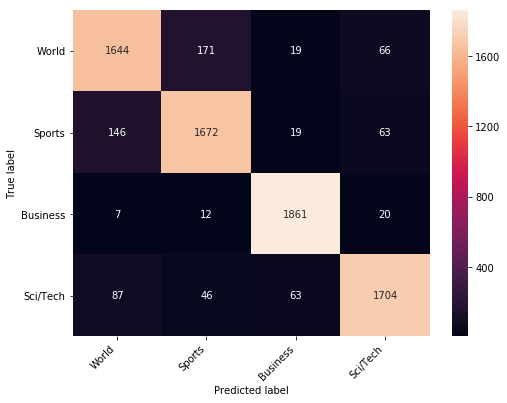

In [92]:
test_pred = best_naive_bayes_clf.predict(test_df["POST_PREP"])
print('test accuracy {0:,.3f}\n'.format(accuracy_score(test_pred, test_df["LABEL"])))
print_confusion_matrix(confusion_matrix(test_df["LABEL"], test_pred), class_names=classes)

# Logistic Regression

In [93]:
best_log_reg_score

0.9229166666666667

test accuracy 0.926



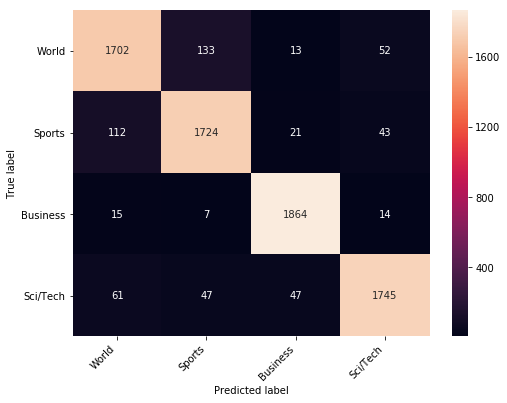

In [94]:
test_pred = best_log_reg_clf.predict(test_df["POST"])
print('test accuracy {0:,.3f}\n'.format(accuracy_score(test_pred, test_df["LABEL"])))
print_confusion_matrix(confusion_matrix(test_df["LABEL"], test_pred), class_names=classes)

# fasttext

In [95]:
best_fasttext_score

0.9219166666666667

test accuracy 0.921



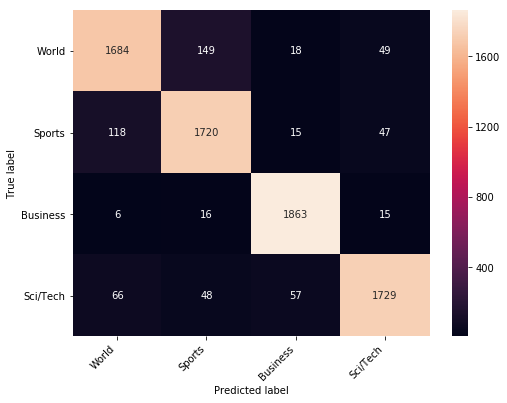

In [97]:
test_pred, _ = best_fasttext_clf.predict(list(test_df["POST_PREP"]))
test_pred = [i[0].split("_")[-1] for i in test_pred]
print('test accuracy {0:,.3f}\n'.format(accuracy_score(test_pred, test_df["LABEL"])))
print_confusion_matrix(confusion_matrix(test_df["LABEL"], test_pred), class_names=classes)